In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from load_mnist import load_mnist
from utils import train_neural_network

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [3]:
# Load MNIST dataset
X_train, Y_train, X_test, Y_test = load_mnist()

# Exercise 1.1  Multi-layer fully-connected neural network

In [4]:
# Hyperparameters
input_size = 784  # 28x28 images
hidden_size_1 = 256
hidden_size_2 = 128
num_classes = 10
num_epochs = 100
batch_size = 128
learning_rate = 0.001

In [5]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long).to(device)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
class NeuralNet(nn.Module):
    def __init__(self, input_size: int, hidden_size_1: int, hidden_size_2: int, num_classes: int):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size_2, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out
    
# Initialize the model
model = NeuralNet(input_size, hidden_size_1, hidden_size_2, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Epoch 1/100, Train Loss: 2.2934, Test Loss: 2.2830, Train Accuracy: 10.83%, Test Accuracy: 12.65%
Epoch 2/100, Train Loss: 2.2747, Test Loss: 2.2632, Train Accuracy: 15.92%, Test Accuracy: 19.50%
Epoch 3/100, Train Loss: 2.2537, Test Loss: 2.2401, Train Accuracy: 24.55%, Test Accuracy: 32.00%
Epoch 4/100, Train Loss: 2.2285, Test Loss: 2.2118, Train Accuracy: 38.03%, Test Accuracy: 46.08%
Epoch 5/100, Train Loss: 2.1970, Test Loss: 2.1758, Train Accuracy: 50.21%, Test Accuracy: 54.95%
Epoch 6/100, Train Loss: 2.1568, Test Loss: 2.1297, Train Accuracy: 57.02%, Test Accuracy: 59.94%
Epoch 7/100, Train Loss: 2.1048, Test Loss: 2.0701, Train Accuracy: 61.16%, Test Accuracy: 63.08%
Epoch 8/100, Train Loss: 2.0377, Test Loss: 1.9933, Train Accuracy: 64.09%, Test Accuracy: 65.85%
Epoch 9/100, Train Loss: 1.9524, Test Loss: 1.8969, Train Accuracy: 66.56%, Test Accuracy: 68.96%
Epoch 10/100, Train Loss: 1.8468, Test Loss: 1.7786, Train Accuracy: 69.43%, Test Accuracy: 71.96%
Epoch 11/100, Train

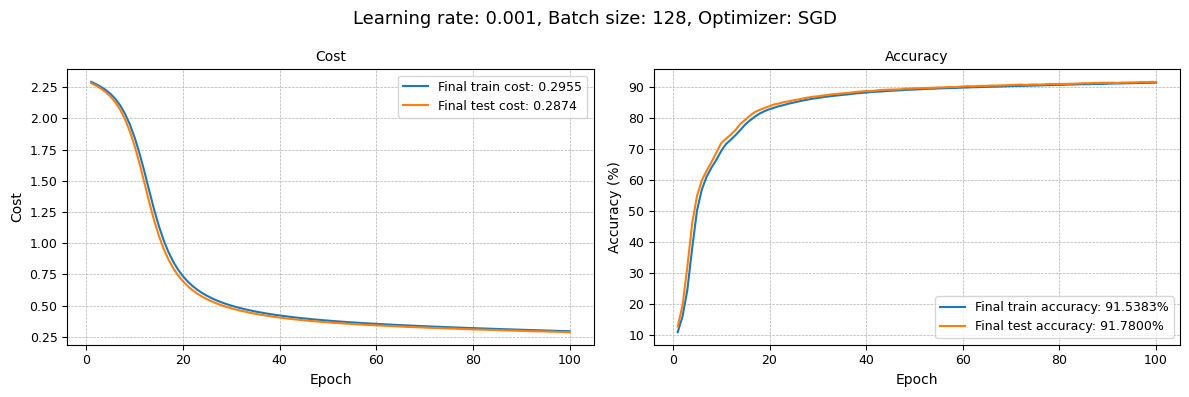

Runtime of train_neural_network: 411.8139 seconds


In [7]:
train_neural_network(model, criterion, optimizer, train_loader, test_loader, num_epochs, device)

# Exercise 1.2 Multi-layer convolutional network

In [8]:
# Convert data to PyTorch tensors
X_train_tensor_3D = torch.tensor(X_train, dtype=torch.float32).to(device).view(-1, 1, 28, 28)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long).to(device)
X_test_tensor_3D = torch.tensor(X_test, dtype=torch.float32).to(device).view(-1, 1, 28, 28)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long).to(device)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor_3D, Y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor_3D, Y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [11]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        
        self.fc = nn.Linear(32*7*7, 10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.pool1(out)
        
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.pool2(out)
        
        out = self.conv3(out)
        out = self.relu3(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


# Hyperparameters
num_epochs = 50
batch_size = 32
learning_rate = 0.01

conv_model = ConvNet().to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(conv_model.parameters(), lr=learning_rate)

Epoch 1/50, Train Loss: 2.0608, Test Loss: 0.7920, Train Accuracy: 47.12%, Test Accuracy: 77.96%
Epoch 2/50, Train Loss: 0.4894, Test Loss: 0.3516, Train Accuracy: 85.19%, Test Accuracy: 89.91%
Epoch 3/50, Train Loss: 0.3220, Test Loss: 0.2789, Train Accuracy: 90.40%, Test Accuracy: 91.84%
Epoch 4/50, Train Loss: 0.2511, Test Loss: 0.2281, Train Accuracy: 92.55%, Test Accuracy: 93.54%
Epoch 5/50, Train Loss: 0.1999, Test Loss: 0.1694, Train Accuracy: 94.05%, Test Accuracy: 95.12%
Epoch 6/50, Train Loss: 0.1639, Test Loss: 0.1456, Train Accuracy: 95.13%, Test Accuracy: 95.96%
Epoch 7/50, Train Loss: 0.1396, Test Loss: 0.1181, Train Accuracy: 95.90%, Test Accuracy: 96.53%
Epoch 8/50, Train Loss: 0.1232, Test Loss: 0.1058, Train Accuracy: 96.40%, Test Accuracy: 96.93%
Epoch 9/50, Train Loss: 0.1101, Test Loss: 0.0990, Train Accuracy: 96.72%, Test Accuracy: 96.80%
Epoch 10/50, Train Loss: 0.1009, Test Loss: 0.0864, Train Accuracy: 97.02%, Test Accuracy: 97.26%
Epoch 11/50, Train Loss: 0.09

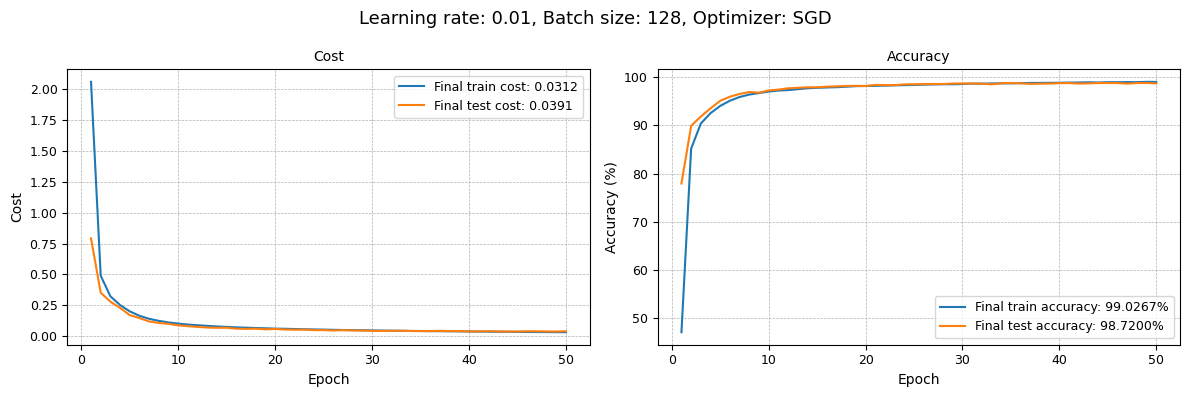

Runtime of train_neural_network: 280.2369 seconds


In [12]:
train_neural_network(conv_model, criterion, optimizer, train_loader, test_loader, num_epochs, device)

# Exercise 1.3 Swap the order of max-pool and activation function

## a\) Swap order of max-pool and ReLU

In [13]:
class ConvNetSwitch(nn.Module):
    def __init__(self):
        super(ConvNetSwitch, self).__init__()
        # Switch order of relu and maxpool
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu1 = nn.ReLU()
        
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu2 = nn.ReLU()
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        
        self.fc = nn.Linear(32*7*7, 10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.pool1(out)
        out = self.relu1(out)
        
        out = self.conv2(out)
        out = self.pool2(out)
        out = self.relu2(out)
        
        out = self.conv3(out)
        out = self.relu3(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

    
conv_switch_model = ConvNetSwitch().to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(conv_switch_model.parameters(), lr=learning_rate)
train_neural_network(conv_switch_model, criterion, optimizer, train_loader, test_loader, num_epochs, device)


Epoch 1/50, Train Loss: 1.5997, Test Loss: 0.4712, Train Accuracy: 56.23%, Test Accuracy: 86.62%
Epoch 2/50, Train Loss: 0.4103, Test Loss: 0.3418, Train Accuracy: 87.53%, Test Accuracy: 89.90%
Epoch 3/50, Train Loss: 0.3433, Test Loss: 0.3243, Train Accuracy: 89.57%, Test Accuracy: 90.44%
Epoch 4/50, Train Loss: 0.3084, Test Loss: 0.2757, Train Accuracy: 90.74%, Test Accuracy: 92.12%
Epoch 5/50, Train Loss: 0.2771, Test Loss: 0.2531, Train Accuracy: 91.68%, Test Accuracy: 92.70%
Epoch 6/50, Train Loss: 0.2441, Test Loss: 0.2309, Train Accuracy: 92.73%, Test Accuracy: 93.48%
Epoch 7/50, Train Loss: 0.2106, Test Loss: 0.1875, Train Accuracy: 93.83%, Test Accuracy: 94.71%
Epoch 8/50, Train Loss: 0.1790, Test Loss: 0.1589, Train Accuracy: 94.74%, Test Accuracy: 95.41%
Epoch 9/50, Train Loss: 0.1527, Test Loss: 0.1357, Train Accuracy: 95.50%, Test Accuracy: 95.99%
Epoch 10/50, Train Loss: 0.1334, Test Loss: 0.1213, Train Accuracy: 96.07%, Test Accuracy: 96.41%
Epoch 11/50, Train Loss: 0.11

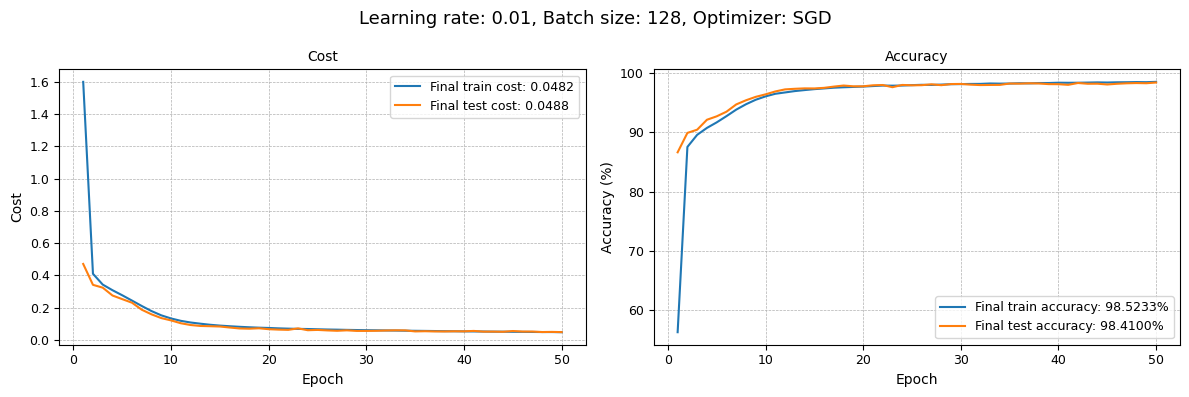

Runtime of train_neural_network: 284.9501 seconds


## b\) Use tanh activation instead of ReLU

In [18]:
class ConvNetTanh(nn.Module):
    def __init__(self):
        super(ConvNetTanh, self).__init__()
        # Switch order of relu and maxpool
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.tanh1 = nn.Tanh()
        
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.tanh2 = nn.Tanh()
        
        self.tanh3 = nn.Tanh()
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        self.fc = nn.Linear(32*7*7, 10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.pool1(out)
        out = self.tanh1(out)
        
        out = self.conv2(out)
        out = self.pool2(out)
        out = self.tanh2(out)
        
        out = self.tanh3(out)
        out = self.conv3(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

    
conv_switch_tanh_model = ConvNetTanh().to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(conv_switch_tanh_model.parameters(), lr=learning_rate)
print(conv_switch_tanh_model)

ConvNetTanh(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (tanh1): Tanh()
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (tanh2): Tanh()
  (tanh3): Tanh()
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)


In [19]:
train_neural_network(conv_switch_tanh_model, criterion, optimizer, train_loader, test_loader, num_epochs, device)


Epoch 1/50, Train Loss: 1.9703, Test Loss: 0.9155, Train Accuracy: 47.92%, Test Accuracy: 77.18%
Epoch 2/50, Train Loss: 0.5943, Test Loss: 0.4432, Train Accuracy: 83.17%, Test Accuracy: 87.61%
Epoch 3/50, Train Loss: 0.4124, Test Loss: 0.3710, Train Accuracy: 87.78%, Test Accuracy: 89.41%
Epoch 4/50, Train Loss: 0.3590, Test Loss: 0.3321, Train Accuracy: 89.43%, Test Accuracy: 90.38%
Epoch 5/50, Train Loss: 0.3269, Test Loss: 0.3026, Train Accuracy: 90.39%, Test Accuracy: 91.41%
Epoch 6/50, Train Loss: 0.3016, Test Loss: 0.2814, Train Accuracy: 91.11%, Test Accuracy: 92.07%
Epoch 7/50, Train Loss: 0.2781, Test Loss: 0.2594, Train Accuracy: 91.75%, Test Accuracy: 92.82%
Epoch 8/50, Train Loss: 0.2552, Test Loss: 0.2390, Train Accuracy: 92.50%, Test Accuracy: 93.41%
Epoch 9/50, Train Loss: 0.2334, Test Loss: 0.2160, Train Accuracy: 93.16%, Test Accuracy: 93.93%
